In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

In [17]:
(x_train , y_train),(x_test , y_test) = cifar10.load_data()

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
y_train.shape

(50000, 1)

In [21]:
import matplotlib.pyplot as plt

In [22]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [23]:
x_train[0].shape

(32, 32, 3)

In [24]:
y_train[0]

array([6], dtype=uint8)

In [25]:
y_train[1][0]

9

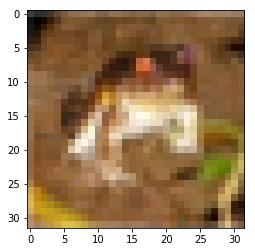

In [26]:
plt.imshow(x_train[0])

In [27]:
target = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

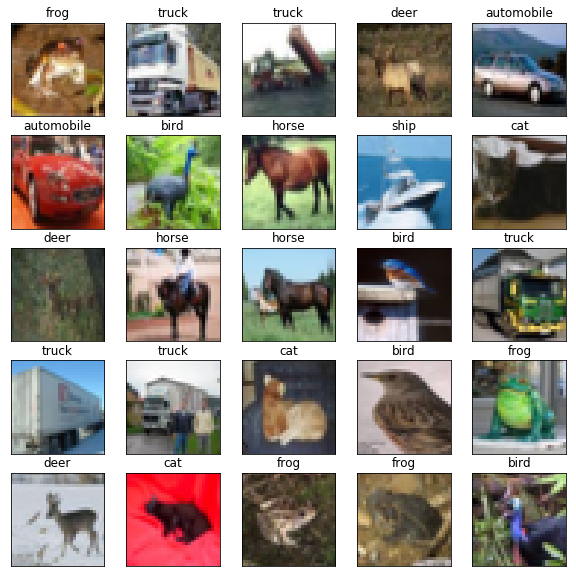

In [28]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(target[y_train[i][0]])
    plt.imshow(x_train[i])
    
plt.show()

## preprocess the data

In [29]:
y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

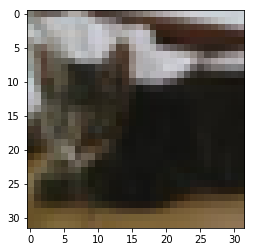

In [32]:
plt.imshow(x_train[9])

In [33]:
y_train.shape

(50000, 10)

## Creating model

In [34]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout , Conv2D , MaxPooling2D

In [35]:
model = Sequential()

model.add(Conv2D(32 , 3 , input_shape=(32,32,3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , 3 , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64 , 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 64)          0         
__________

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.fit(x_train,y_train,batch_size=1000,epochs=5,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 70s 1ms/step - loss: 2.0999 - acc: 0.2190 - val_loss: 1.8373 - val_acc: 0.3235
Epoch 2/5
50000/50000 [==============================] - 67s 1ms/step - loss: 1.7900 - acc: 0.3411 - val_loss: 1.6134 - val_acc: 0.4225
Epoch 3/5
50000/50000 [==============================] - 67s 1ms/step - loss: 1.6099 - acc: 0.4093 - val_loss: 1.4664 - val_acc: 0.4741
Epoch 4/5
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5109 - acc: 0.4465 - val_loss: 1.3969 - val_acc: 0.4988
Epoch 5/5
50000/50000 [==============================] - 68s 1ms/step - loss: 1.4551 - acc: 0.4721 - val_loss: 1.3579 - val_acc: 0.5185


In [39]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 617us/step


[1.3578936904907226, 0.5185]

In [40]:
pred = model.predict(x_test)

In [41]:
pred.shape

(10000, 10)

In [42]:
y_test.shape

(10000, 10)

In [43]:
pred[678].argmax() == y_test[678].argmax()

False